<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Installation" data-toc-modified-id="Installation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installation</a></span><ul class="toc-item"><li><span><a href="#Cloning-the-project" data-toc-modified-id="Cloning-the-project-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cloning the project</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Compilation" data-toc-modified-id="Compilation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Compilation</a></span></li></ul></li><li><span><a href="#Running-a-case" data-toc-modified-id="Running-a-case-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Running a case</a></span><ul class="toc-item"><li><span><a href="#The-advection-equation" data-toc-modified-id="The-advection-equation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The advection equation</a></span><ul class="toc-item"><li><span><a href="#Calling-the-right-modules-for-running-the-case" data-toc-modified-id="Calling-the-right-modules-for-running-the-case-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Calling the right modules for running the case</a></span></li></ul></li></ul></li><li><span><a href="#Advection-equation-solver" data-toc-modified-id="Advection-equation-solver-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Advection equation solver</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-results" data-toc-modified-id="Plotting-the-results-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plotting the results</a></span></li></ul></li><li><span><a href="#Euler-equations" data-toc-modified-id="Euler-equations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Euler equations</a></span></li></ul></div>

# Description

MUFFIN (MUlti-Fluid solver for IoN propulsion) is a finite volume solver for the fluid equations in electric propulsion applications. 

MUFFIN is written mainly in C++ and interfaced with other libraries. MUFFIN is created as a module for python, using pybind11 (https://pybind11.readthedocs.io/en/stable/). Additionally, it is also parallelized with MPI (https://en.wikipedia.org/wiki/Message_Passing_Interface) and uses PETSc (https://www.mcs.anl.gov/petsc/) for the resolution of linear systems.

# Installation

## Cloning the project

If you are reading this, it means that you have cloned the git repository of MUFFIN. If you want to clone it in a different computer, you need to do in a terminal:

`git clone https://hephaistos.lpp.polytechnique.fr/rhodecode/GIT_REPOSITORIES/LPP/Users/Alvarez/MUFFIN ./`

`cd MUFFIN`

`git submodule update --init --recursive`

## Dependencies

You need to have a version of cmake, install PETSc, and python (version > 3.0).

## Compilation

Once you are in `./MUFFIN`, you need to create a folder where you will build (compile) your executable. To do so, you need to do:

```mkdir build; cd build; cmake ..; make -j 16;```

If the compilation worked, you should arrive to the 100% of the compilation without any compilation error. If you have compilation errors, it means that you might have problems with the compilation of the external dependencies (PETSC, python or MPI).

# Running a case

## The advection equation

With MUFFIN you can solve different system of equations. We will start with a simple 1D case solving for the advection equation. This equation reads:

$$ \partial_t \rho + a\partial_x \rho = 0$$,
with $a > 0$.

We will study the case with the following initial field and boundary conditions:

$$\rho(t=0, x) = 0,~~~ \rho(t, x = 0) = 1 ~~~\text{and}~~~\partial_x\rho(t, x = L) = 0$$


In order to run the case, you need to create a python script that will use the module `muffin`, as explained below.


### Calling the right modules for running the case

Inside the python script, you need to write the following. You will find the testcase inside the folder `testcases/test_advectionEq.py`.

First, you need to call the right python modules that will be used to create the configuration file of muffin. We suggest to do the following:

In [1]:
import sys
#from mpi4py import MPI
sys.path.append(sys.path[0] + '/../PythonTools/')
import plotResults 
sys.path.append('../build')                     ## We add this to include the module muffin
import muffin                                   ## module in C++ doing the simulation
import glob                                     ## module for unix pathname pattern expansioni
import matplotlib.pyplot as plt                 ## plots
import os                                       ## operating system interface
import numpy as np                              ## Mathematic operations:w

ModuleNotFoundError: No module named 'muffin'

In [3]:
sys.executable

# from platform import python_version

# python_version()

'/Users/alaguna/opt/anaconda3/bin/python'

# Advection equation solver

The following piece of code resolves the advection equation in 1D. 

The C++ code is loaded in python with the command:

```python
import solver
```

The scheme options are the following:

  - reconstruction:
    - 1stOrder
    - TVD2ndOrder1D
  - limiter:
    - Venkatakrishnan
    - ospre
    - vanAldaba
    - minmod

The value of the advection speed as well as the Inlet can be changed.

In [1]:
import sys

sys.path.append('../')
import muffin				## module in C++ doing the simulation
import glob				## module for unix pathname pattern expansioni
import matplotlib.pyplot as plt 	## plots 
import os 				## operating system interface
import numpy as np			## Mathematic operations:w
import sys
from importlib import reload
#reload(sys)  
#sys.setdefaultencoding('utf8')

In [2]:
#!/usr/bin/env python3
import sys
from mpi4py import MPI
sys.path.append(sys.path[0] + '/..')
import muffin                           ## module in C++ doing the simulation
import glob                             ## module for unix pathname pattern expansioni
import matplotlib                       ## Add these two lines to show results
matplotlib.use('TkAgg')                 ## It uses tk to not freeze
import matplotlib.pyplot as plt         ## plots
import os                               ## operating system interface
import numpy as np                      ## Mathematic operations:w

comm = MPI.COMM_WORLD
myrank = comm.Get_rank()
world_size = comm.size

## Set the options
nbCells = 100
length  = 1.
InitialField = [0.1 for i in range(nbCells)]
# Set Mesh
mesh = [0 for i in range(nbCells)]
for iCell in range(nbCells):
       delta_X = length/nbCells
       mesh[iCell] = delta_X/2. + iCell*delta_X


options = {
        'nbEqs':1,
        'nbFluids':1,
        'nbCells':[nbCells],
        'geometry':"1D",
        'mesh':mesh,
        'stopCondition':{'type':"nbSteps",'value':200},
        #'stopCondition':{'type':"Residual",'value':-12},
        'Inlet':{'type':"Dirichlet", 'value':[1.],},
        'Outlet':{'type':"Neumann",},
        'PhysicalModel':{
                'type':"AdvectionEq1D",
                'A':1.,
                },
        'SourceTerm':{'type':"NullSourceTerm",},
        'CFL':0.1,
        'saveRate':1,
        'resultDir':"./Results_advection",
        'limiter':"thirdOrder",#"thirdOrder",
        'reconstruction':"TVD2ndOrder1D",
        'fluxScheme':"LaxFriedrich",
        'timeScheme':"ForwardEuler",#"TVDRK3",
        'initialField':InitialField,
}

## Run simulation
# comm.barrier()
# muffin.Solver(options)
# sys.stdout.flush()




ImportError: No module named 'mpi4py'

## Plotting the results

The post-processing is performed in a module that is imported as follows:
```python
  import plotResults
```

You can take the results by using
```python
  plotData = plotResults.Data()
```


The options are introduced as parameters in the functions of the module. Functions implemented:
```python
  plotResults.makePlot(plotData.resultsArray)
```

For the moment, we need to import the following in order to open the dialog box:
```python
import tkinter
import tkinter.filedialog
%gui tk
```


Reading /Users/alaguna/Documents/16_PostDoc/16_C++Code/5_Muffin/testcases/Results_advection/file_iter_000670_time_0.6700.txt


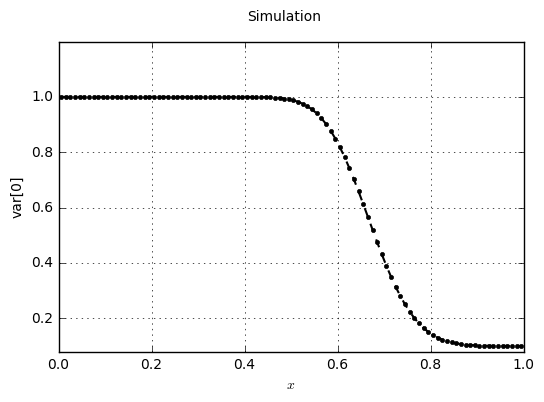

In [3]:
sys.path.append(sys.path[0] + '../PythonTools/')
import plotResults

plotData = plotResults.Data()
plotResults.makePlot(plotData.resultsArray)


Reading /Users/alaguna/Documents/16_PostDoc/16_C++Code/1_ProceduralCode/EulerIsothermalProcedural/EulerIsothermalProcedural/Results_SodTube_test/file_iter_001000_time_0.2156.txt


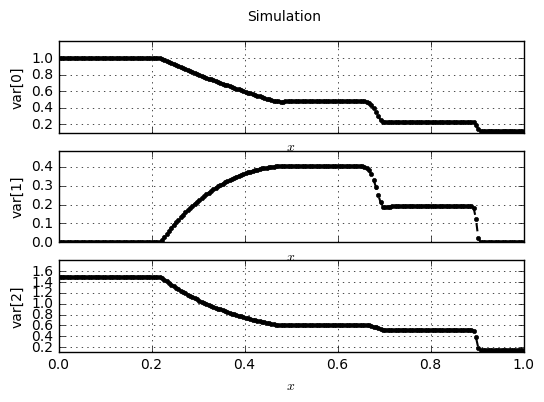

In [3]:
sys.path.append(sys.path[0] + '../PythonTools/')
import plotResults

plotData = plotResults.Data()
plotResults.makePlot(plotData.resultsArray)


# Euler equations

We solve the Euler equations with the same code, using the same numerical scheme as before.

The numerical flux scheme can be chosen between:

  - LaxFriedrich 
  - RoeEuler1D
  
As before, first and second order schemes can be used.

In [1]:
import solver				## module in C++ doing the simulation
import glob				## module for unix pathname pattern expansioni
import matplotlib.pyplot as plt 	## plots 
import os 				## operating system interface
import numpy as np			## Mathematic operations:w
import sys
from importlib import reload

## Set the options
nbCells_half = 100
nbCells = 2*nbCells_half
nbEqs   = 3
InitialField = [0 for i in range(3*nbCells)]
# Set the density
for iCell in range(nbCells_half):
        InitialField[0*nbCells + iCell] = 1
for iCell in range(nbCells_half, nbCells):
        InitialField[0*nbCells + iCell] = 0.125
# Set the momentum
for iCell in range(nbCells):
        InitialField[1*nbCells + iCell] = 0
# Set the total energy
for iCell in range(nbCells_half):
        InitialField[2*nbCells + iCell] = 1./(5./3. - 1.)
for iCell in range(nbCells_half, nbCells):
        InitialField[2*nbCells + iCell] = 0.1/(5./3. - 1.)

options = {
        'nbEqs':nbEqs,
        'nbCells':nbCells,
        'Inlet':{'type':"Neumann",},
        'Outlet':{'type':"Neumann",},
        'PhysicalModel':"EulerEq1D",
        'CFL':0.45,
        #'stopCondition':{'type':"Residual",'value':-12},
        'stopCondition':{'type':"nbSteps",'value':200},
        'saveRate':5,
        'resultDir':"./Results_SodTube",
        'limiter':"Venkatakrishnan",#"Venkatakrishnan",
        'reconstruction':"TVD2ndOrder1D",
        'fluxScheme':"RoeEuler1D",
        'initialField':InitialField,
}

## Run simulation
solver.Solver(options)

ImportError: No module named 'solver'

In [2]:
import plotResults

import tkinter
import tkinter.filedialog

%gui tk

plotResults.plotSingleResult(options)

ImportError: No module named 'plotResults'

In [3]:
import plotResults

import tkinter
import tkinter.filedialog

%gui tk

results = plotResults.getResultsSingleFile(options)

x = results[0,:]
rho = results[1,:]
rhoU = results[2,:]
rhoE = results[3,:]

U = rhoU[:]/rho[:]
P = (rhoE[:] - rho[:]*U[:]*U[:]/2.)*(5./3. - 1)

primitiveVars = results
primitiveVars[0,:] =  x 
primitiveVars[1,:] =  rho
primitiveVars[2,:] =  U
primitiveVars[3,:] =  P


plotResults.makePlot(primitiveVars)

ImportError: No module named 'plotResults'